# Multiclass Classification with Neural Nets via sklearn

In [1]:
from sklearn import datasets
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import sklearn as sk
import sys

print(sk.__version__)
print(np.__version__)
print(sys.version)

0.18
1.11.1
3.5.1 |Anaconda custom (x86_64)| (default, Dec  7 2015, 11:24:55) 
[GCC 4.2.1 (Apple Inc. build 5577)]


In [7]:
print("[X] downloading data...")
mnist = datasets.fetch_mldata("MNIST Original")

[X] downloading data...


In [8]:
from sklearn.model_selection import train_test_split

#Temporarily reduce the training set to speed up execution while testing...
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size = 0.15)
print('X_train size :', X_train.shape)


X_train size : (59500, 784)


## A size of 500 seems better that 2500 (and it is faster...). overfitting ???

In [4]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(500,), max_iter=250, alpha=1e-4,
                    solver='lbfgs', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

#notes :
#layersize = 100, max_iter = 50  ==> 0.87 / 0.87 (train/test)
#layersize = 100, max_iter = 100  ==> 0.93 / 0.92 (train/test)
#layersize = 500, max_iter = 250  ==> 1.00 / 0.97 (train/test) (10 minutes)


In [6]:
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(500,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=250, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False)

In [9]:
print('Training score: ', mlp.score(X_train, y_train))
print('Test score: ', mlp.score(X_test, y_test))

Training score:  0.995226890756
Test score:  0.995333333333


**** WRONG ****
proba img :  [[  1.09633406e-49   1.48108566e-46   5.50199317e-41   1.80029839e-34
    3.00101206e-27   1.00000000e+00   1.01420571e-49   8.71760410e-18
    1.23200960e-11   1.59253844e-22]]
guessed: 5


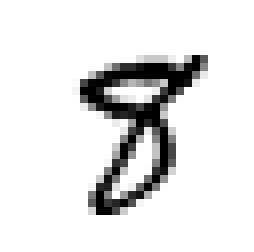

***************
**** WRONG ****
proba img :  [[  2.52385200e-08   2.08280332e-22   9.99996671e-01   3.14047013e-06
    6.88533397e-35   1.47590433e-07   4.82871592e-41   1.10145264e-10
    1.10745013e-08   4.77246194e-09]]
guessed: 2


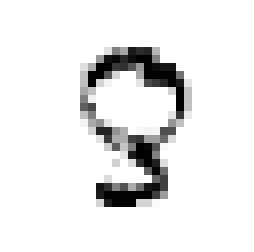

***************
**** WRONG ****
proba img :  [[  2.76963180e-14   5.57925351e-43   1.92586233e-22   3.69069216e-36
    7.78093457e-32   1.75849944e-06   9.99982951e-01   1.70793680e-18
    1.52902599e-05   1.76260774e-25]]
guessed: 6


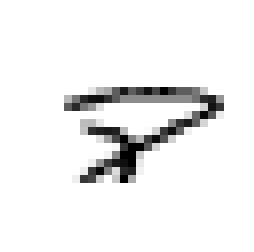

***************
**** WRONG ****
proba img :  [[  2.76963180e-14   5.57925351e-43   1.92586233e-22   3.69069216e-36
    7.78093457e-32   1.75849944e-06   9.99982951e-01   1.70793680e-18
    1.52902599e-05   1.76260774e-25]]
guessed: 6


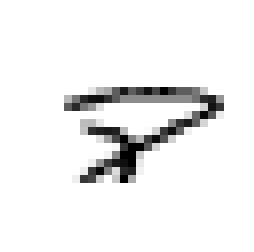

***************
**** WRONG ****
proba img :  [[  1.81688992e-36   1.06362082e-43   2.08235481e-39   5.70194610e-16
    1.82248298e-21   5.76916739e-16   2.70250395e-39   8.19293512e-37
    1.35708122e-05   9.99986429e-01]]
guessed: 9


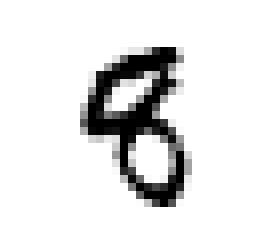

***************
**** WRONG ****
proba img :  [[  1.09633406e-49   1.48108566e-46   5.50199317e-41   1.80029839e-34
    3.00101206e-27   1.00000000e+00   1.01420571e-49   8.71760410e-18
    1.23200960e-11   1.59253844e-22]]
guessed: 5


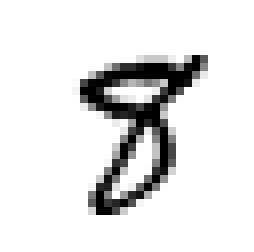

***************
**** WRONG ****
proba img :  [[  2.76963180e-14   5.57925351e-43   1.92586233e-22   3.69069216e-36
    7.78093457e-32   1.75849944e-06   9.99982951e-01   1.70793680e-18
    1.52902599e-05   1.76260774e-25]]
guessed: 6


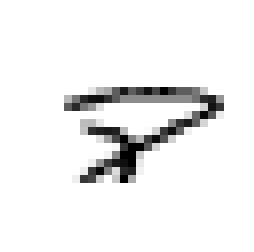

***************
guessed percentage: 0.993


In [13]:
def getRandomDigitFrom(n):
    r = np.random.randint(0,1000)
    img = mnist.data[3000+n*6000+r].reshape(28,28)    
    return img

#iterate until something wrong is found
digit_to_find = 8
errors = 0
nb_tests = 1000
for i in range(nb_tests):
    img = getRandomDigitFrom(digit_to_find)
    img = img.reshape(1,-1)
    proba_img = mlp.predict_proba(img)
    guessed = np.argmax(proba_img)
    if ( guessed != digit_to_find):
        errors = errors + 1
        print('**** WRONG ****')
        print('proba img : ', proba_img)
        print('guessed:', guessed)
        img = img.reshape(28,28)
        plt.axis('off')
        plt.imshow(img,cmap=plt.cm.gray_r, interpolation='nearest')
        plt.show()
        print('***************')
        
print('guessed percentage:', (nb_tests-errors)/nb_tests)



In [ ]:
### From scikit-learn documentation... odd result...

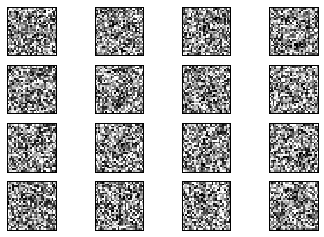

In [14]:

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()